In [186]:
!pip install tld
!pip install tldextract


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import tldextract
from sklearn import tree
from colorama import Fore
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from tld import get_tld,is_tld


LOAD DATASET

In [188]:

data=pd.read_csv('./data/URL.csv')
data.head(30)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [190]:
count=data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

Text(0, 0.5, 'Count')

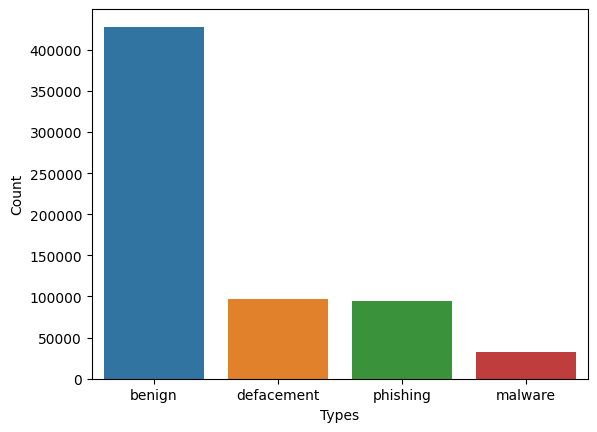

In [191]:
sns.barplot(x=count.index,y=count)
plt.xlabel("Types")
plt.ylabel("Count")

In [192]:
data['url']=data['url'].replace('www.','',regex=True)
data.head(20)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [193]:
data['Category']=data['type']
data['Category'].replace({"benign":0,"defacement":1,"phishing":2,"malware":3},inplace=True)
data.head(20)

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


In [194]:
data['url_len'] = data['url'].apply(lambda x:len(x))
data.head(20)

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46
8,http://pashminaonline.com/pure-pashminas,defacement,1,40
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45


In [195]:
special_characters=['@','?','-','=','.','#','%','+','$','!','*',',','//']
def haveChar(i,char):
    if i.count(char):
        return 1
    return 0
    
for char in special_characters:
    data[char]=data['url'].apply(lambda i:haveChar(i,char))
data.head(20)

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,0,0,0,0,0,0,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,0,0,0,0,0,0,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,0,0,0,0,0,0,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0


In [196]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 0
    else:
        return 1
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
data.head(20)
    

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,0,0,0,0,0,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,0,0,0,0,0,0,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,0,0,0,0,0,0,1,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0,1
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,0,0,0,0,0,0,0,1
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,0,0,0,0,0,0,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [197]:
def isHTTPS(url):
    scheme= urlparse(url).scheme

    str_scheme=str(scheme)
    if str_scheme=='https':
        return 1 
    return 0
data['https']=data['url'].apply(lambda i:isHTTPS(i))
data.head(20)

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [198]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits=digits+1
    return digits
data['digits']=data['url'].apply(lambda i:digit_count(i))
data.head(20)

,url,type,Category,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,22
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,5


In [199]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
data['letters']= data['url'].apply(lambda i: letter_count(i))
data.head(20)

,url,type,Category,url_len,@,?,-,=,.,#,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,22,199
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,93
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,4,31
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,40
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,34
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,5,33


In [200]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0 
data['shortining_service']=data['url'].apply(lambda i:Shortining_Service(i))
data.head(20)

,url,type,Category,url_len,@,?,-,=,.,#,...,$,!,*,",",//,abnormal_url,https,digits,letters,shortining_service
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,...,0,0,0,0,1,0,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,...,0,0,0,0,1,0,0,22,199,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,93,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,...,0,0,0,0,0,1,0,4,31,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,40,1
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,34,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,...,0,0,0,0,0,1,0,5,33,0


In [201]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
data.head(20)



,url,type,Category,url_len,@,?,-,=,.,#,...,!,*,",",//,abnormal_url,https,digits,letters,shortining_service,having_ip_address
0,br-icloud.com.br,phishing,2,16,0,0,1,0,1,0,...,0,0,0,0,1,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,1,0,...,0,0,0,0,1,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,1,0,...,0,0,0,0,1,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,0,1,1,1,1,0,...,0,0,0,1,0,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,0,1,1,1,1,0,...,0,0,0,1,0,0,22,199,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,0,0,1,0,1,0,...,0,0,0,1,0,0,1,93,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,0,1,0,1,0,...,0,0,0,0,1,0,4,31,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,0,1,1,1,1,0,...,0,0,0,0,1,0,0,40,1,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,0,0,1,0,1,0,...,0,0,0,1,0,0,0,34,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,0,0,1,0,1,0,...,0,0,0,0,1,0,5,33,0,0


C:\Users\legen\AppData\Local\Temp\ipykernel_12832\2060371620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5)


<Axes: >

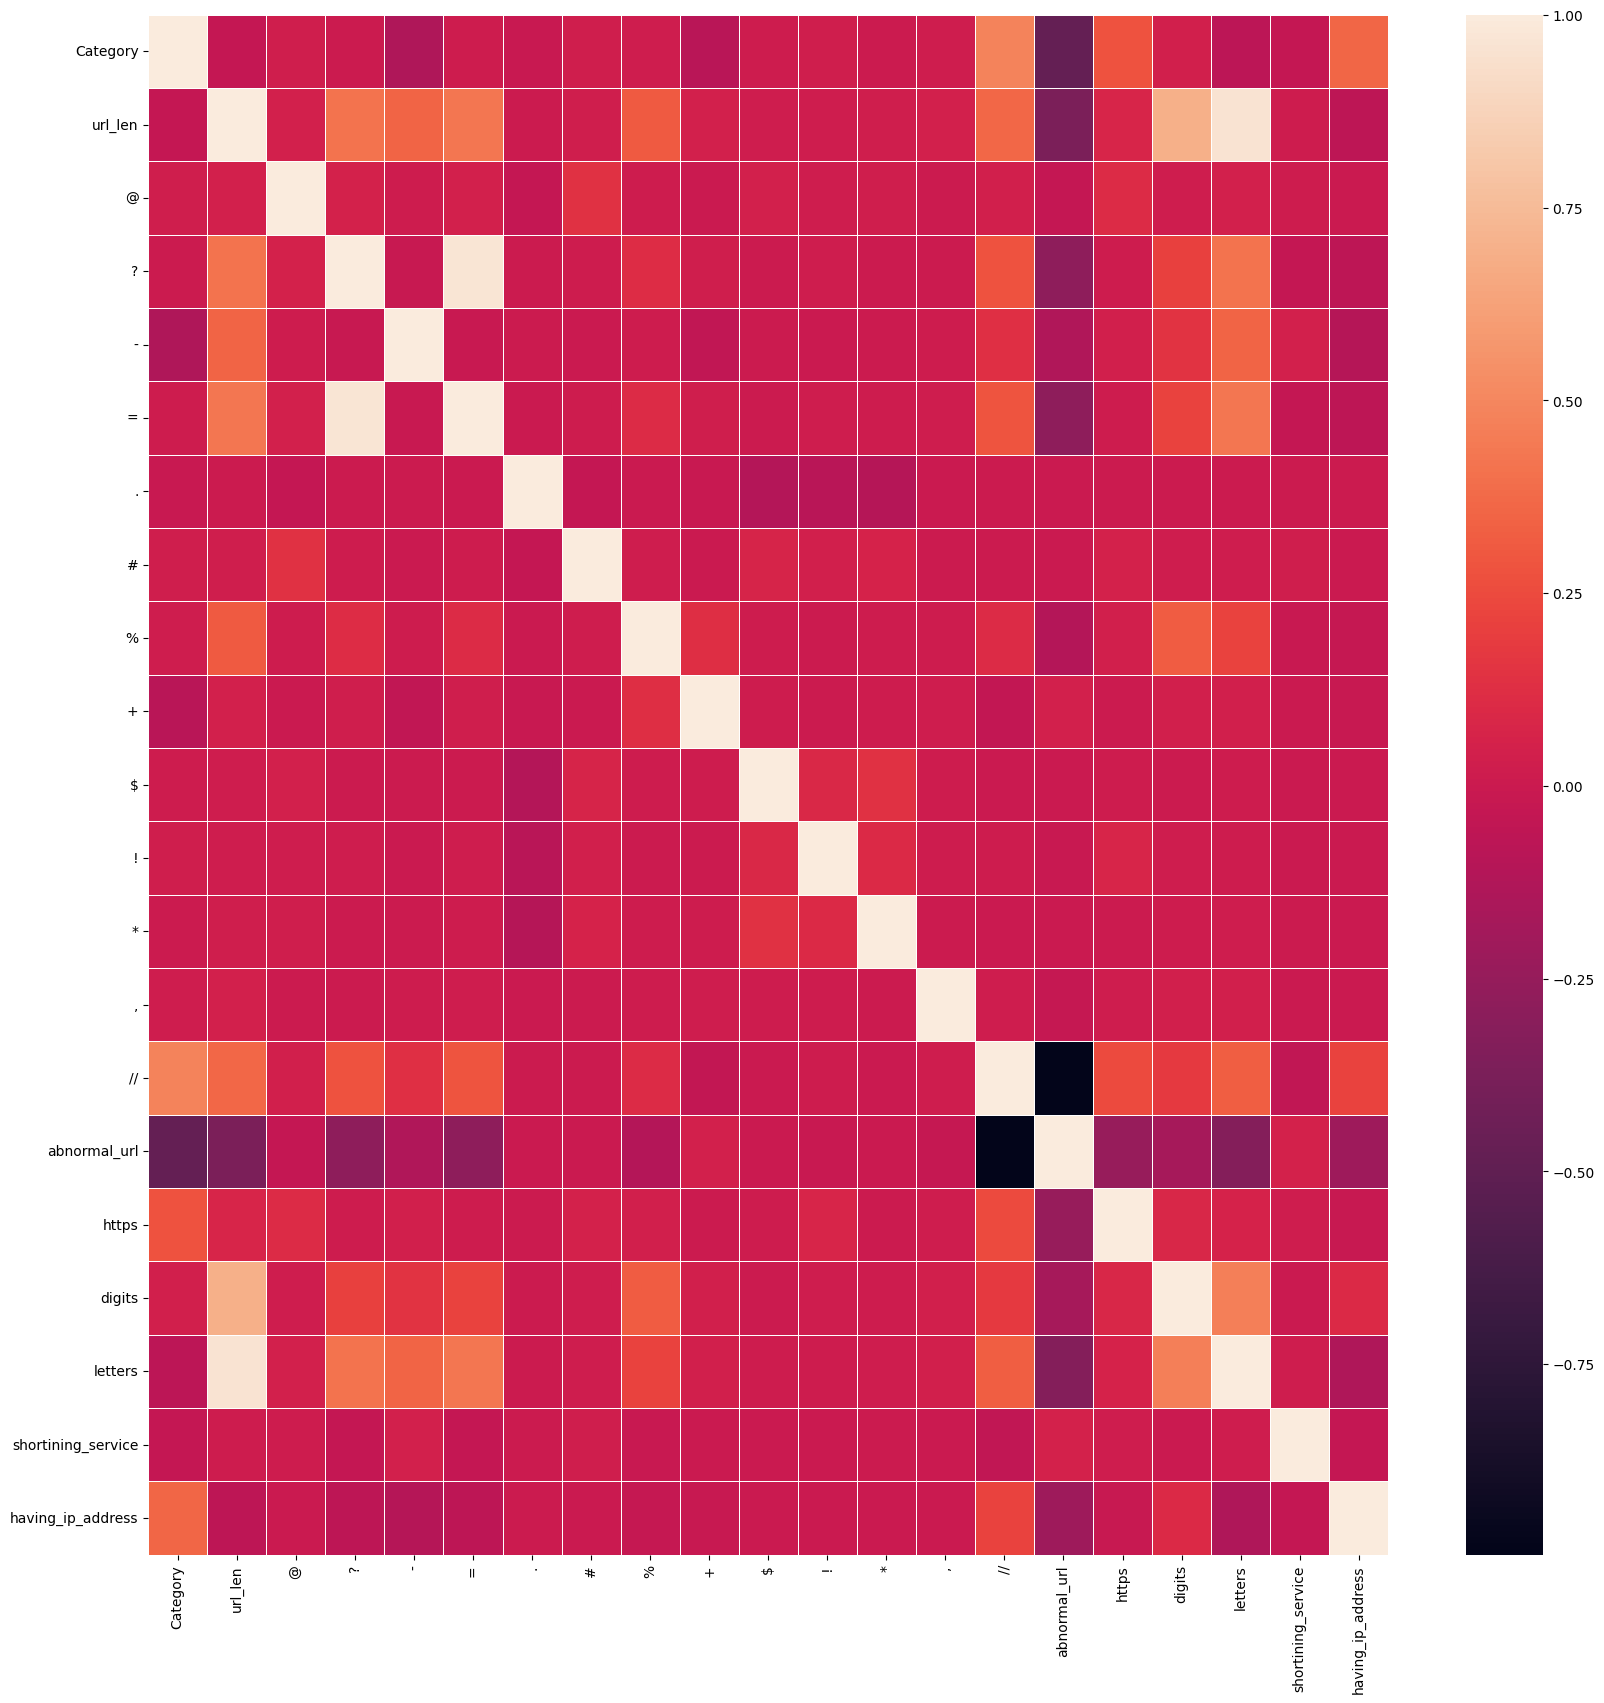

In [202]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), linewidths=.5)

In [203]:
X = data.drop(['url','type','Category'],axis=1)
y=data['Category']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)


--------------------------------------------------------
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
<class 'pandas.core.series.Series'>
Test Accuracy :  88.76%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85565
           1       0.89      0.94      0.92     19319
           2       0.81      0.42      0.56     18805
           3       0.93      0.87      0.90      6550

    accuracy                           0.89    130239
   macro avg       0.88      0.80      0.83    130239
weighted avg       0.88      0.89      0.87    130239

             Confusion_matrix 


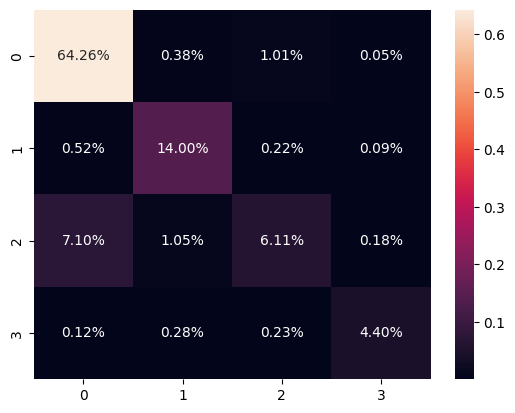

###################- End -###################
--------------------------------------------------------
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
<class 'pandas.core.series.Series'>


In [204]:
models = [DecisionTreeClassifier,RandomForestClassifier,GaussianNB]

accuracy_test=[]
accuracy_train=[]
for m in models:
    print('--------------------------------------------------------')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    print(type(y_train))
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    # print('Training Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc2*100))

    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier',
                                'Random Forest Classifier',
                                'Gaussian NB'],
                      "Accuracy":accuracy_test})
output

In [ ]:
X_test

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [ ]:
def URL_Converter(urls):
    data= pd.DataFrame()
    data['url'] = pd.Series(urls)

    
    data['url_len'] = data['url'].apply(lambda x: len(str(x)))
    data['domain'] = data['url'].apply(lambda i: process_tld(i))
    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for a in feature:
        data[a] = data['url'].apply(lambda i: i.count(a))  
    data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
    data['https'] = data['url'].apply(lambda i: httpSecure(i))
    data['digits']= data['url'].apply(lambda i: digit_count(i))
    data['letters']= data['url'].apply(lambda i: letter_count(i))
    data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
    data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
    print(data.columns)
    X = data.drop(['url','domain'],axis=1)
    
    return X

In [ ]:
urls= ['diaryofagameaddict.com',
'espdesign.com.au',
'iamagameaddict.com',
'kalantzis.net',
'slightlyoffcenter.net',
'toddscarwash.com',
'tubemoviez.com',
'ipl.hk',
'crackspider.us/toolbar/install.php?pack=exe',
'pos-kupang.com/',
'rupor.info',
'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
'officeon.ch.ma/office.js?google_ad_format=728x90_as',
'sn-gzzx.com',
'sunlux.net/company/about.html',
'outporn.com',
'timothycopus.aimoo.com',
'xindalawyer.com',
'freeserials.spb.ru/key/68703.htm',
'deletespyware-adware.com',
'orbowlada.strefa.pl/text396.htm',
'ruiyangcn.com',
'zkic.com',
'adserving.favorit-network.com/eas?camp=19320;cre=mu&grpid=1738&tag_id=618&nums=FGApbjFAAA',
'cracks.vg/d1.php',
'juicypussyclips.com',
'nuptialimages.com',
'andysgame.com',
'bezproudoff.cz',
'ceskarepublika.net',
'hotspot.cz',
'gmcjjh.org/DHL',
'nerez-schodiste-zabradli.com',
'nordiccountry.cz',
'nowina.info',
'obada-konstruktiwa.org',
'otylkaaotesanek.cz',
'pb-webdesign.net',
'pension-helene.cz',
'podzemi.myotis.info',
'smrcek.com',
'spekband.com',
'm2132.ehgaugysd.net/zyso.cgi?18',
'webcom-software.ws/links/?153646e8b0a88',
'worldgymperu.com',
'zgsysz.com',
'oknarai.ru',
'realinnovation.com/css/menu.js']

In [ ]:
test_data= URL_Converter(urls)

In [ ]:
models

In [ ]:
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(test_data)
    print(pred)

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier',
                                'Random Forest Classifier',
                                'Gaussian NB'],
                      "Accuracy":accuracy_test})
output